# Краулеры и апи

В этой тетрадке мы будем добывать данные из интернета

## Модуль [requests](https://realpython.com/python-requests/)

Давайте посмотрим html формат

Лучший учебник - https://www.w3schools.com

![](https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/data/tag.png "tag")

Вот пример очень простого сайта в интернете https://itcorp.com/, зарегистрированного в 1986 году.

И сайта посложнее https://spork.org/, посвящённый ложковилке (последнее обновление в 1996).

Давайте узнаем, что пишут про [кофемолку BOSCH MKM-6003](https://irecommend.ru/content/kofemolka-bosch-mkm-6003).

Мы видим много отзывов, но они отображаются не целиком. Нажмём "читать весь отзыв" и перейдём на страницу с полным текстом. Например, [эту](https://irecommend.ru/content/vzhik-vzhik-i-aromatnyi-molotyi-kofe-gotov-takzhe-sakharnaya-pudra-ovsyanaya-muka-granitnaya).

Теперь скачаем html страничку

In [ ]:
import requests

In [ ]:
url = 'https://irecommend.ru/content/vzhik-vzhik-i-aromatnyi-molotyi-kofe-gotov-takzhe-sakharnaya-pudra-ovsyanaya-muka-granitnaya'
response = requests.get(url)

In [ ]:
# отключим предупреждения
from urllib3.exceptions import InsecureRequestWarning
from urllib3 import disable_warnings
disable_warnings(InsecureRequestWarning)

response = requests.get(url)

В `response` теперь лежит ответ сервера. Это не просто html-код страницы, а еще дополнительная информация

In [ ]:
response

<Response [200]>

In [ ]:
response.status_code
# 200 - "всё работает"
# 404, 503 и др. - "произошла ошибка, не работает, такой страницы нет и т.д."

200

In [ ]:
# Вывели первые 210 символов html
print(response.text[:210])

<!DOCTYPE html>
<!--[if IE 7 ]>		 <html class="no-js ie ie7 lte7 lte8 lte9" lang="ru"> <![endif]-->
<!--[if IE 8 ]>		 <html class="no-js ie ie8 lte8 lte9" lang="ru"> <![endif]-->
<!--[if IE 9 ]>		 <html class="


### Что делать, если сайт защищается?

Если он защищается от краулеров, можно, например, представиться Мозиллой:

In [ ]:
# адрес страницы, которую мы хотим скачать
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.2 Safari/605.1.15'  # хотим притворяться браузером

response = requests.get(url, headers={'User-Agent':user_agent})

Или использовать **специальную библиотеку**:

In [ ]:
! pip3 install fake-useragent

In [ ]:
from fake_useragent import UserAgent

In [ ]:
user_agent = UserAgent().chrome
user_agent

'Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Mobile Safari/537.36'

In [ ]:
response = requests.get(url,
                        headers={'User-Agent':user_agent},
                        verify=False)

Или **прокси-сервер**. Это дополнительное звено между вами и интернетом, через него пойдет подключение и сайт не будет знать, что это вы посылаете запрос.

Адреса прокси можно взять со специальных сайтов. И потом проверить, что они рабочие, прежде чем использовать https://checkerproxy.net/

[Пример сервиса](https://whatismyipaddress.com/ip-lookup), который позволяет с некоторой точностью отследить по IP адресу

Возвращаемся к скачиванию странички.

In [ ]:
response.url  #ссылка

'https://irecommend.ru/content/ya-ne-kofeman-no-kofemolka-mne-neobkhodima-vse-ob-izyashchnoi-pomoshchnitse-na-moei-kukhne-c'

In [ ]:
print(response.text[:300])  # html код

<!DOCTYPE html>
<html class="no-js" lang="ru">
  <head>
    <title>Irecommend</title>
    <meta name="robots" content="noindex" />
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1.0, user


Как же нам из тегов вытащить нужный кусочек текста?

Существует несколько вариантов, как достать что-то из определенного тега, например, достать заголовок:

- регулярные выражения (плохой вариант)
- специальные библиотеки питона, например, BeautifulSoup (bs4) или lxml (хороший вариант)


Если мы хотим вывести текст отзыва, нужно посмотреть, какими тегами он оформляется.

Заходим на наш сайт

На этом конкретном сайте заголовки отзывов лежат внутри тегов `<h2 class="class="reviewTitle">`

Это можно узнать, щёлкнув правой кнопкой мыши по странице и нажав "Просмотр кода страницы".

А если выделить интересующий кусок текста, щёлкнуть правой кнопкой мыши и нажать "Просмотреть код", он откроется рядом с выделенным нужным вам блоком html.

Регулярные выражения мы видели в [тетрадке №2](https://github.com/knapweedss/TextMining_HSE/blob/main/sem2/Sem2_TextMiningHSE.ipynb)

In [ ]:
import re

In [ ]:
code = response.text
re.search(r'<h2 class="reviewTitle"(.|\n)*?<\/h2>', code).group()
# Мы нашли по шаблону первое вхождение:
# всё что угодно в теге h2 класса "reviewTitle"

'<h2 class="reviewTitle" itemprop="name">\n      <a href="/content/vzhik-vzhik-i-aromatnyi-molotyi-kofe-gotov-takzhe-sakharnaya-pudra-ovsyanaya-muka-granitnaya" class="review-summary active" itemprop="url">Вжик-вжик и ароматный молотый кофе готов, а также сахарная пудра, овсяная мука, гранитная крошка..СТОП! Так с чем же справляется кофемолка BOSCH, а что не следует молоть НИ В КОЕМ СЛУЧАЕ. Рецепт необычного овсяного печенья прилагается.</a>    </h2>'

Теперь умный способ:

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
# инициализируем (создаем) soup из response.text (кода страницы)
soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify()[:500])  # печатаем приукрашенный суп

<!DOCTYPE html>
<!--[if IE 7 ]>		 <html class="no-js ie ie7 lte7 lte8 lte9" lang="ru"> <![endif]-->
<!--[if IE 8 ]>		 <html class="no-js ie ie8 lte8 lte9" lang="ru"> <![endif]-->
<!--[if IE 9 ]>		 <html class="no-js ie ie9 lte9>" lang="ru"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js ab6" lang="ru">
 <!--<![endif]-->
 <head prefix="fb: http://ogp.me/ns/fb#">
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Кофемолка BOSCH MKM-6003 - «Вжик-вжи


\- Как устроен этот тег для заголовка?

\- h2 - имя тега (расшифровка: header 2 = заголовок 2ого уровня), class - имя атрибута (атрибутов может быть много), "reviewTitle" - значение атрибута

In [ ]:
comment_header = soup.find('h2', {'class':"reviewTitle"})
print(comment_header.prettify())

<h2 class="reviewTitle" itemprop="name">
 <a class="review-summary active" href="/content/vzhik-vzhik-i-aromatnyi-molotyi-kofe-gotov-takzhe-sakharnaya-pudra-ovsyanaya-muka-granitnaya" itemprop="url">
  Вжик-вжик и ароматный молотый кофе готов, а также сахарная пудра, овсяная мука, гранитная крошка..СТОП! Так с чем же справляется кофемолка BOSCH, а что не следует молоть НИ В КОЕМ СЛУЧАЕ. Рецепт необычного овсяного печенья прилагается.
 </a>
</h2>



Нас интересует только текст, поэтому сделаем `get_text`

In [ ]:
print(comment_header.get_text())


Вжик-вжик и ароматный молотый кофе готов, а также сахарная пудра, овсяная мука, гранитная крошка..СТОП! Так с чем же справляется кофемолка BOSCH, а что не следует молоть НИ В КОЕМ СЛУЧАЕ. Рецепт необычного овсяного печенья прилагается. 


Ура! У нас есть заголовок.

Теперь найдём текст отзыва

In [ ]:
# попробуйте сами и только потом посмотрите ниже

In [ ]:
comment_text = soup.find('div', {'class': "description hasinlineimage",
                                 'itemprop': "reviewBody"})
print(comment_text.get_text()[:1500])

# itemprop можно было не указывать (указали для примера),
# потому что блок с class='description hasinlineimage" уникален


Доброго времени суток!В тот момент, когда меня осенило перейти на свежесваренный кофе, встал вопрос о приобретении кофемолки. Критериями отбора явились относительно бюджетная стоимость, компактность, ну и качество измельчительного агрегата. Мой выбор пал на бренд BOSCH, к которому у меня есть доверие, ибо я уже являюсь счастливой обладательницей его стационарного миксера.Среди нескольких моделей я выбрала кофемолку BOSCH MKM-6003 в классическом чёрном цвете. ►►►ОБЩАЯ ИНФОРМАЦИЯВес: 500 грМощность:180 ВтПроизводство: СловенияГабариты, мм:170 х 90 х 90Место покупки: ИМ "Ozon"Цена: 1063 руб. (2017 год).Гарантия: 1 год ►►►ОПИСАНИЕ ◉ ХАРАКТЕРИСТИКИПервоначально кофемолка была упакована в картонную коробку, которая сразу же была утилизирована. Внутри коробки помимо электрического прибора находилась ещё и инструкция по эксплуатации, которую я советую всё же прочитать перед началом пользования. Обладая стильным дизайном, кофемолка BOSCH MKM-6003 без проблем впишется практически в любой кухонн

Когда мы сделали .get_text(), мы заменили теги на пустые строки. Поэтому часть предложений слиплись. А в некоторых местах возникли большие пропуски.

Давайте заменим теги на переносы строк, а потом переносы подряд сократим до единичных.

In [ ]:
no_tags = re.sub('<.*?>', '\n', str(comment_text))
sing_n = re.sub('\n+', '\n', str(no_tags))
print(sing_n[:500])


Доброго времени суток!
В тот момент, когда меня осенило перейти на свежесваренный кофе, встал вопрос о приобретении кофемолки. Критериями отбора явились относительно бюджетная стоимость, компактность, ну и качество измельчительного агрегата. Мой выбор пал на бренд BOSCH, к которому у меня есть доверие, ибо я уже являюсь счастливой обладательницей его 
стационарного миксера
.
Среди нескольких моделей я выбрала кофемолку BOSCH MKM-6003 в классическом чёрном цвете.
 
►►►
ОБЩАЯ ИНФОРМАЦИЯ
Вес: 
500


### Тренировка

Найдите тег, в котором лежит информация об опыте использования кофемашины. Выведите информацию об этом пользователе

In [ ]:
# Ваш код

Вот здесь можно [посмотреть часть документации BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc.ru/bs4ru.html)

Теперь вы можете скачать отсюда и оценку автора, и комментарии.

In [ ]:
# Ваш код

Найдём достоинства и недостатки

In [ ]:
plus = soup.find('ul', {'itemprop': "positiveNotes"})
minus = soup.find('ul', {'itemprop': "negativeNotes"})
print('+', re.sub('\n+', '\n', plus.get_text()))
print('-', re.sub('\n+', '\n', minus.get_text()))

+ 
Качество на уровне
Компактная
Можно регулировать степень помола
Ножи из нержавеющей стали
Простая в использовании
Сдержанное и стильное оформление
Хорошо измельчает

- 
Шумная



### Пишем краулер

Теперь давайте обкачаем много отзывов.

1. Где взять ссылки на каждый отзыв?
- на общей странице отзывов о [кофемашине](https://irecommend.ru/content/kofemolka-bosch-mkm-6003) есть кнопки "читать весь озыв" с ссылками на конкретные отзывы

In [ ]:
comments_url = 'https://irecommend.ru/content/kofemolka-bosch-mkm-6003'
response = requests.get(comments_url,
                        headers={'User-Agent':user_agent},
                        verify=False)
soup = BeautifulSoup(response.text, 'html.parser')

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'irecommend.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
# нам нужно найти не один тег, а все подобные, поэтому find_all
soup.find_all('a', {'class':"reviewTextSnippet"})[:3]

[<a class="reviewTextSnippet" data-text="Читать весь отзыв" href="/content/vzhik-vzhik-i-aromatnyi-molotyi-kofe-gotov-takzhe-sakharnaya-pudra-ovsyanaya-muka-granitnaya" style="display: block;">
 <div class="reviewTitle">Вжик-вжик и ароматный молотый кофе готов, а также сахарная пудра, овсяная мука, гранитная крошка..СТОП! Так с чем же справляется кофемолка BOSCH, а что не следует молоть НИ В КОЕМ СЛУЧАЕ. Рецепт необычного овсяного печенья прилагается.</div>
 <span class="reviewTeaserText"></span>
 </a>,
 <a class="reviewTextSnippet" data-text="Читать весь отзыв" href="/content/prostaya-udobnaya-nadezhnaya-kofemolka-otzyv-posle-15-let-ispolzovaniya-plyusy-minusy" style="display: block;">
 <div class="reviewTitle">Простая, удобная, НАДЕЖНАЯ кофемолка! Отзыв после 1,5 лет использования! Плюсы, минусы!</div>
 <span class="reviewTeaserText">Всем привет!)   На прошлой кофемолке я решила сэкономить) Купила ее на Сима-Ленде…</span>
 </a>,
 <a class="reviewTextSnippet" data-text="Читать весь от

2. Как вытащить ссылки из тегов?

In [ ]:
links = []
for a in soup.find_all('a', {'class':"reviewTextSnippet"}):
    links.append(a['href'])
print(len(links))
links[:5]

70


['/content/vzhik-vzhik-i-aromatnyi-molotyi-kofe-gotov-takzhe-sakharnaya-pudra-ovsyanaya-muka-granitnaya',
 '/content/prostaya-udobnaya-nadezhnaya-kofemolka-otzyv-posle-15-let-ispolzovaniya-plyusy-minusy',
 '/content/kraine-nuzhnaya-veshch-v-dome-lyubitelei-kofe-kofemolka-ot-firmy-bosh-rassmatrivayu-vneshnii',
 '/content/podruzhka-kofemana-bolee-5-let-zasluzhivaet-bolee-5-zvezd-chto-mozhno-i-chto-ne-stoit-molot',
 '/content/smalyvaet-v-vozdushnuyu-muku-i-ne-tolko-kofe-byudzhetnaya-moshchnaya-kofemolka-pomoshchnitsa']

3. Теперь надо ходить по этим ссылкам и брать необходимую информацию из отзывов

Нюанс: это неполные ссылки.
Чтобы они заработали, надо перед ними добавить `https://irecommend.ru/`

In [ ]:
from tqdm import tqdm
import time
# чтобы не задавать очень много вопросов подряд,
# будем спать между запросами (немного ждать)

Осторожно! Сайт защищается: если не спать между запросами, он блокирует вас (response становится 521)

In [ ]:
# вытащим достоинства и недостатки кофемашины из отзывов, если они указаны
pluses = []
minuses = []

for link in tqdm(links):
    response = requests.get('https://irecommend.ru'+link,
                            headers={'User-Agent':user_agent})
    soup = BeautifulSoup(response.text, 'html.parser')
    plus = soup.find('ul', {'itemprop': "positiveNotes"})
    minus = soup.find('ul', {'itemprop': "negativeNotes"})
    if plus is not None and minus is not None:
        pluses.append(re.sub('\n+', '\n', plus.get_text()).strip().split('\n'))
        minuses.append(re.sub('\n+', '\n', minus.get_text()).strip().split('\n'))
    time.sleep(5)

100%|██████████| 70/70 [06:53<00:00,  5.91s/it]


Наш код зашёл на 70 страниц и сложил в аккуратном виде плюсы и минусы. Сколько бы вы это делали руками?

Примечательно, что теперь мы можем выполнить такую же процедуру с любым товаром на этом сайте, не меняя код.

In [ ]:
pluses[:5]

[['Качество на уровне',
  'Компактная',
  'Можно регулировать степень помола',
  'Ножи из нержавеющей стали',
  'Простая в использовании',
  'Сдержанное и стильное оформление',
  'Хорошо измельчает'],
 ['Долговечная',
  'Компактная',
  'Мощная',
  'Небольшая',
  'Ножи из нержавеющей стали',
  'Сдержанное и стильное оформление'],
 ['Большой объем чаши',
  'Дизайн',
  'Компактная',
  'Недорогая',
  'Ножи из нержавеющей стали',
  'Простая в использовании',
  'Сдержанное и стильное оформление',
  'Хорошо измельчает'],
 ['Большой объем чаши',
  'Долговечная',
  'Компактная',
  'Можно регулировать степень помола',
  'Мощная',
  'Недорогая',
  'Простая в использовании',
  'Сдержанное и стильное оформление',
  'Хорошо измельчает'],
 ['Компактная',
  'Не шумная',
  'Недорогая',
  'Ножи из нержавеющей стали',
  'Простая в использовании',
  'Сдержанное и стильное оформление',
  'Хорошо измельчает']]

In [ ]:
minuses[:5]

[['Шумная'],
 ['В комплекте нет кисти для очистки чаши', 'Нельзя мыть', 'Шумная'],
 ['На корпусе остаются пятна от пальцев',
  'Нельзя использовать более 30 секунд без перерыва',
  'Нельзя мыть',
  'Немного коротковат шнур'],
 ['В комплекте нет кисточки',
  'Короткий шнур',
  'Нельзя мыть',
  'Нет места для намотки шнура',
  'Шумная'],
 ['В комплекте нет кисточки',
  'Можно молоть только кофе',
  'Нельзя мыть',
  'Нет места для намотки шнура']]

In [ ]:
! pip install pymystem3

In [ ]:
from pymystem3 import Mystem
m = Mystem()
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
pluses_lem = m.lemmatize(' '.join([plus for plus_pers in pluses for plus in plus_pers]))
minuses_lem = m.lemmatize(' '.join([minus for minus_pers in minuses for minus in minus_pers]))

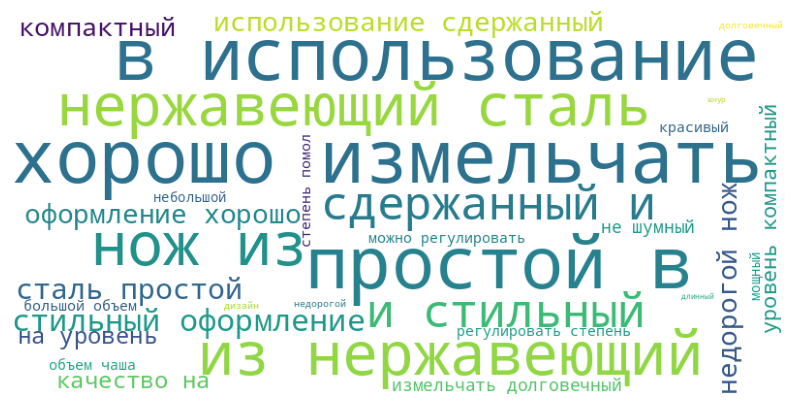

In [ ]:
text_data = ''.join(pluses_lem)
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color ='white').generate(text_data)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

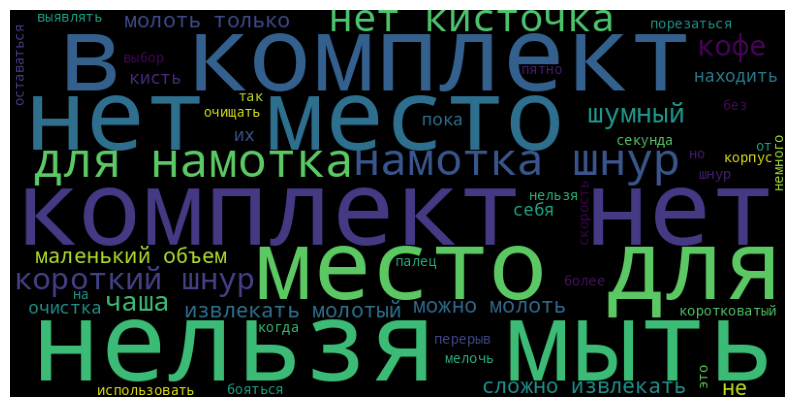

In [ ]:
text_data = ''.join(minuses_lem)
wordcloud = WordCloud(width=800,
                      height=400).generate(text_data)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Придумайте, зачем это может быть вам нужно.

*Посмотрев разные кофемашины, мы узнаем, что вообще ценят в них, и чем наша (не)выгодно отличается от других.*

# Часть 2. API

## API VK

В тетрадке №2 мы уже обсуждали апи вк. Закрепим.

Давайте добудем тексты постов со страницы сообщества https://vk.com/madebynessy, посвящённого украшениям из полимерной глины

Нам потребуется уже знакомый метод https://dev.vk.com/ru/method/wall.get

В инструкции [просят ключ доступа](https://dev.vk.com/ru/api/access-token/getting-started#%D0%9A%D0%BB%D1%8E%D1%87%20%D0%B4%D0%BE%D1%81%D1%82%D1%83%D0%BF%D0%B0%20%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8F:~:text=%D0%BD%D0%B0%D1%81%D1%82%D1%80%D0%BE%D0%B9%D0%BA%D0%B0%D1%85%20%D0%B2%D0%B0%D1%88%D0%B5%D0%B3%D0%BE%20%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F)

Пройдите шаги инструкции: создайте приложение, запомните сервисный ключ доступа.

In [ ]:
wall_get_url = "https://api.vk.com/method/wall.get"

my_token = "ваш токен"

In [ ]:
#отправляем запрос, преобразуем результат в словарь

wall_nessy = requests.get(
    wall_get_url,
    params={
        "owner_id": -212538372,  # ID юзера
        "count": 2000,  # количество постов
        "v": 5.81, # версия API
        "access_token": my_token  # токен доступа
    }
).json()

В общем виде:

requests.get(\*ссылка на метод\*, \*нужные вам параметры, которые объяснены на странице метода\*)).json()

\- Как узнать id страницы или сообщества, если в ссылке он не прописан явно (https://vk.com/durov, а не https://vk.com/id1)?

\- Откройте любое фото на этой странице. В ссылке сразу после photo перед нижним подчёркиванием будет нужный вам id: https://vk.com/durov?z=photo1_456316241%2Falbum1_00%2Frev

У людей id положительные, у сообществ отрицательные.

In [ ]:
wall_nessy['response']['count'], len(wall_nessy['response']['items'])
# всего постов 401
# но получить за 1 раз можно не больше 100 постов

(401, 100)

In [ ]:
all_posts_nessy = []
for number in tqdm(range(0, 500, 100)):
  offset = number
  wall = requests.get(
    wall_get_url,
    params={
        "owner_id": -212538372,
        "count": 100,
        "v": 5.81,
        'offset':offset,
        "access_token": my_token}).json()
  posts = wall.get('response').get('items')
  all_posts_nessy.extend(posts)

100%|██████████| 5/5 [00:06<00:00,  1.37s/it]


In [ ]:
len(all_posts_nessy)  # теперь у нас есть все

401

In [ ]:
all_posts_nessy[2]

{'inner_type': 'wall_wallpost',
 'comments': {'can_post': 1, 'count': 1},
 'marked_as_ads': 0,
 'hash': 'LECiOXY6hLTHGGvuaA',
 'type': 'post',
 'attachments': [{'type': 'photo',
   'photo': {'album_id': -7,
    'date': 1715875656,
    'id': 457242767,
    'owner_id': -212538372,
    'access_key': 'e628b75ce39be3fd7c',
    'sizes': [{'height': 75,
      'type': 's',
      'width': 75,
      'url': 'https://sun1-23.userapi.com/impg/GLHEeSOnCd9GGp1O9EFPvJOLgk0HE9cZdds8tA/SKtHiRQxy44.jpg?size=75x75&quality=95&sign=9f97fda2437e80b7768de5916ce12dd4&c_uniq_tag=_BxHxtqWFHoH9MStLqWWUByz1yebbw_Y2uKFdjcj2iQ&type=album'},
     {'height': 130,
      'type': 'm',
      'width': 130,
      'url': 'https://sun1-23.userapi.com/impg/GLHEeSOnCd9GGp1O9EFPvJOLgk0HE9cZdds8tA/SKtHiRQxy44.jpg?size=130x130&quality=95&sign=60d74d365fa3cc3457edbe7c15bc627b&c_uniq_tag=gcU16N-lR5PSYf4O6bWeIueQ21MzvcbxH3e6C0X3HiQ&type=album'},
     {'height': 604,
      'type': 'x',
      'width': 604,
      'url': 'https://sun1-23

In [ ]:
all_posts_nessy[2]['text']  # текст поста

'На часах у нас уже 23:00, а я только добралась до вк! Не, ну вы представляете?\n\nТак-с! Пост со второй частью морского обновления выйдет завтра в 18:30 по МСК :)\nУрааааааа!)\n\nЕщё хочу рассказать про мой любимый маячок из первой части!!)!)))\nПрежде чем я решила добавить маяки, у меня в голове нарисовался образ такого полуночного, безоблачного неба со звёздами ⭐\nПонятие "Путеводная Звезда" быстро сплелись со смыслом и предназначением маяков и поэтому они получились особенные, притягивающие и словно по настоящему светящиеся ✨'

In [ ]:
all_posts_nessy[2]['date']

1715882629

In [ ]:
from datetime import datetime

# timestamp is number of seconds since 1970-01-01
timestamp = all_posts_nessy[2]['date']

# convert the timestamp to a datetime object in the local timezone
dt_object = datetime.fromtimestamp(timestamp)
str(dt_object)

'2024-05-16 18:03:49'

In [ ]:
print('Просмотров:', all_posts_nessy[2]['views']['count'])
print('Лайков:', all_posts_nessy[2]['likes']['count'])
print('Репостов:', all_posts_nessy[2]['reposts']['count'])
# там ещё много другой информации

Просмотров: 3833
Лайков: 70
Репостов: 3


In [ ]:
posts_info = []
for post in all_posts_nessy:
    posts_info.append([post['id'],
                      post['text'],
                      post['views']['count'],
                      post['likes']['count'],
                      post['reposts']['count'],
                      str(datetime.fromtimestamp(post['date']))])
len(posts_info)

401

In [ ]:
import pandas as pd
nessy_posts = pd.DataFrame(posts_info, columns=['id', 'text', 'views',
                                   'likes', 'reposts', 'date'])
nessy_posts.head()

,id,text,views,likes,reposts,date
0,1561,"Так-с:\n•\nСразу скажу, что все вещи из списка...",6534,100,4,2024-04-08 07:08:00
1,1650,М О Р С К О Е\npart 2\n\nКак видите тут есть к...,2597,227,26,2024-05-17 15:30:00
2,1646,"На часах у нас уже 23:00, а я только добралась...",3833,70,3,2024-05-16 18:03:49
3,1633,М О Р С К О Е\npart 1\n\nРабота оказалась прия...,14227,352,30,2024-05-08 13:49:32
4,1628,На прошлой неделе я работала над миниатюрами ш...,6134,132,2,2024-05-02 08:12:00


### Тренировка

Найдите самый залайканный пост

In [ ]:
# Ваш код

На самом деле с помощью апи можно делать совершенно разные вещи.

Давайте ещё узнаем про подписчиков группы.

In [ ]:
members = requests.get('https://api.vk.com/method/groups.getMembers',
       params={
        "group_id": 212538372,
        "fields": 'sex, country, city, bdate, education',
        "v": 5.81,
        "access_token": my_token}).json()

In [ ]:
member_ids = []
member_infos = []
for member in members['response']['items']:
    member_ids.append(member['id'])
    member_infos.append([member['id'],
                         member['first_name']+'_'+member['last_name'],
                         member['sex'] if 'sex' in member else None,
                         member['country']['title'] if 'country' in member else None,
                         member['city']['title'] if 'city' in member else None,
                         member['bdate'] if 'bdate' in member else None,
                         member['education'] if 'education' in member else None])

In [ ]:
nessy_membs = pd.DataFrame(member_infos, columns=['id', 'name',
                                                  'sex', 'country',
                                                  'city', 'date',
                                                  'education'])
nessy_membs.head()

,id,name,sex,country,city,date,education
0,4335,Viktoria_Karpicheva,1.0,Russia,Saint Petersburg,None,None
1,4717,Maria_Dmitrieva,1.0,Russia,Saint Petersburg,22.6.1989,None
2,5595,Marina_Baykina,1.0,Russia,Penza,6.10,None
3,29750,Alina_Kovalyova,1.0,Russia,Saint Petersburg,5.3,None
4,33695,Anna_Kosheleva,1.0,Russia,Saint Petersburg,None,None


In [ ]:
# откуда подписчики?
nessy_membs['city'].value_counts()

city
Moscow               191
Saint Petersburg     157
Perm                  85
Nizhny Novgorod       15
Yekaterinburg         15
                    ... 
Vsevolozhsk            1
Shatura                1
Novi Sad               1
Yuzhno-Sakhalinsk      1
Donetsk                1
Name: count, Length: 153, dtype: int64

### Тренировка

Посмотрите, какое соотношение по гендеру.

In [ ]:
# ваш код

## [API Telegram](https://core.telegram.org/methods)

Посмотрим, о чём пишет радио Пурга в своём [тг канале](https://t.me/purgaradio)

Нам снова нужно создать приложение и создать ключ [по инструкции](https://core.telegram.org/api/obtaining_api_id)

Здесь по шагам расписано, как достать посты из канала: https://school.kontur.ru/publications/2609

In [ ]:
! pip install telethon

In [ ]:
from telethon.sync import TelegramClient

In [ ]:
api_id = 'ваш id'
api_hash = 'ваш hash'
phone = '+79104788268'
channel_link = "t.me/purgaradio"

client = TelegramClient(phone, api_id, api_hash)

In [ ]:
await client.start()

In [ ]:
me = await client.get_me()

In [ ]:
dialogs = await client.get_dialogs()

In [ ]:
for dialog in dialogs:
    if dialog.title == 'Пурга радио':
        messages = client.iter_messages(dialog)
        print(type(messages))

<class 'telethon.client.messages._MessagesIter'>


In [ ]:
i = 0

async for message in messages:
    if i < 10:
        print(message)
        i+=1
    else:
        break

Message(id=3025, peer_id=PeerChannel(channel_id=1564524670), date=datetime.datetime(2024, 5, 20, 2, 32, 15, tzinfo=datetime.timezone.utc), message='📻Сегодня у нас в прямом эфире поговорим о Государственно информационной системе жилищно-коммунального хозяйства. \n\n🎙Расскажем о пользе приложения «Госуслуги.Дом».\n\nГостем станет заместитель начальника Департамента промышленной политики, начальник Государственной жилищной инспекции Дмитрий  Ермаков.\n\n📲Присоединяйтесь к эфиру и пишите ваши вопросы под этим постом или на номер телеграм +7 924 789 22-22', out=False, mentioned=False, media_unread=False, silent=False, post=True, from_scheduled=False, legacy=False, edit_hide=True, pinned=False, noforwards=False, invert_media=False, offline=False, from_id=None, from_boosts_applied=None, saved_peer_id=None, fwd_from=None, via_bot_id=None, via_business_bot_id=None, reply_to=None, media=MessageMediaPhoto(spoiler=False, photo=Photo(id=5357429514134739940, access_hash=-3778593218154981727, file_re

In [ ]:
messages_info = []
async for message in messages:
        if i < 100:
            messages_info.append([message.id, str(message.date),
            message.message, message.views,
            message.forwards,
            message.replies.replies if message.replies != None else None])
            i+=1
        else:
            break

In [ ]:
mess = pd.DataFrame(messages_info, columns=['id', 'date',
                                            'text', 'views',
                                            'forwards', 'replies'])
mess

,id,date,text,views,forwards,replies
0,3025,2024-05-20 02:32:15+00:00,📻Сегодня у нас в прямом эфире поговорим о Госу...,472,5,2.0
1,3024,2024-05-19 22:45:27+00:00,"🎭Сегодня в 11:00 гостем ""Отмороженного утра"" с...",379,1,0.0
2,3023,2024-05-19 22:34:55+00:00,Можно посадить пассажира или нет?\n\nВ новой з...,380,1,1.0
3,3022,2024-05-18 03:40:08+00:00,💬 Жители Анадыря смогут пообщаться с народным ...,769,1,0.0
4,3021,2024-05-17 07:05:11+00:00,📢Коротко о главных новостях за последние сутки...,641,1,0.0
...,...,...,...,...,...,...
95,2929,2024-04-23 05:09:14+00:00,,846,5,0.0
96,2928,2024-04-23 04:40:11+00:00,"🎦Несмотря на то, что итоги фестивальной недели...",2286,8,6.0
97,2927,2024-04-23 02:30:58+00:00,🎙Сегодня гостем программы «Своё дело» станет и...,832,6,1.0
98,2926,2024-04-23 01:27:53+00:00,Надо пропускать трамвай или нет?\nПравило о то...,819,2,1.0


In [ ]:
mess.describe()

,id,views,forwards,replies
count,100.000000,100.000000,100.000000,96.000000
mean,2974.990000,812.210000,2.400000,1.385417
std,29.447606,283.989411,2.141462,3.027487
min,2925.000000,379.000000,0.000000,0.000000
25%,2949.750000,689.750000,1.000000,0.000000
50%,2974.500000,772.000000,2.000000,0.000000
75%,3000.250000,850.000000,3.000000,1.000000
max,3025.000000,2456.000000,10.000000,17.000000


<Axes: xlabel='views', ylabel='forwards'>

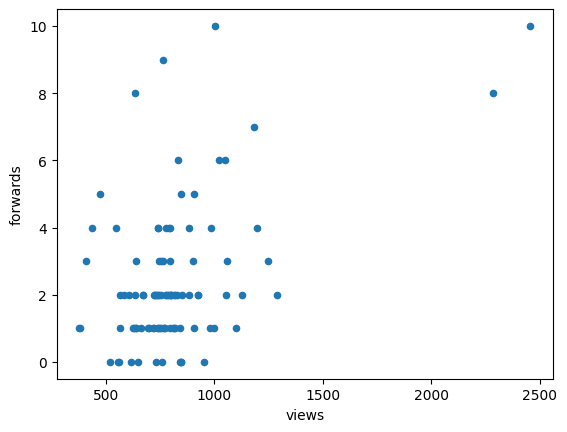

In [ ]:
mess.plot.scatter('views', 'forwards')

In [ ]:
mess[mess['views'] == mess['views'].max()]['text']

79    🎦В рамках VIII Арктического международного кин...
Name: text, dtype: object

In [ ]:
mess['text'][79]

'🎦В рамках VIII Арктического международного кинофестиваля «Золотой ворон» 27 и 28 апреля состоятся показы спектакля «Евгений Онегин» Московского театра комедии.\n\n📻А через несколько минут в нашем эфире появятся люди, к этому причастные:\n\n🎭Актёры театра и кино МАКАР ЗАПОРОЖСКИЙ и СЕРГЕЙ ПИОРО,\nа также художественный руководитель, директор и актёр Московского театра Комедии СЕРГЕЙ ЕФРЕМОВ.\n\nСегодня, 26 апреля, с 15 до 16 гости расскажут нам о спектакле, театре, кино и многом другом.\n\n📻Присоединяйтесь к эфиру и задавайте вопросы в Telegram +7 (924) 789-22-22 или в комментариях под этим постом.'